In [30]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
#rtatman_english_word_frequency_path = kagglehub.dataset_download('rtatman/english-word-frequency')
#bilalelebi_dataset_path = kagglehub.dataset_download('bilalelebi/dataset')

print('Data source import complete.')


Data source import complete.


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


etymology = pd.read_csv('etymology.csv')
display(etymology)

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
0,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,group_derived_root,NaN,NaN,NaN,0.0,0IIU6TlkSA2D7dg1PfxGOw,NaN,NaN
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0.0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
2,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0.0,NaN,0IIU6TlkSA2D7dg1PfxGOw,1.0
3,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,doublet_with,sqiifJX3XIOQ0vZ0trzRaA,English,treasure,0.0,NaN,NaN,NaN
4,iwDzanYmWxaUKbOlUy2yyQ,Latin,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1849970,C4toVEoxV2yxzuGk3jo1QA,Latin,exheredandus,etymologically_related_to,4spOj7ajVB6GdQ7QRK17KA,Latin,exhērēdō,0.0,NaN,NaN,NaN
1849971,5bjGxpwCXLeUmN6n9pMuEA,Ladino,akel,derived_from,1h0dYccGXqSskCB2Nr1AmQ,Latin,eccu,0.0,NaN,NaN,NaN
1849972,5bjGxpwCXLeUmN6n9pMuEA,Ladino,akel,etymologically_related_to,WcDU7_5aX5GyxvcKZDy05w,Latin,ille,0.0,NaN,NaN,NaN
1849973,ODnEfS8-UbSB1rmYu6Q4tQ,Pagu,akel,inherited_from,lIzEzCsoUgOgx46zs03ezg,Proto-North Halmahera,*aker,0.0,NaN,NaN,NaN


In [32]:
etymology.columns

Index(['term_id', 'lang', 'term', 'reltype', 'related_term_id', 'related_lang',
       'related_term', 'position', 'group_tag', 'parent_tag',
       'parent_position'],
      dtype='object')

In [33]:
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
display(engl)

,term,reltype,related_lang,related_term
0,thesaurus,group_derived_root,NaN,NaN
1,thesaurus,borrowed_from,Latin,thēsaurus
2,thesaurus,derived_from,Ancient Greek,θησαυρός
3,thesaurus,doublet_with,English,treasure
5,portmanteau,has_root,Proto-Indo-European,*per- (fare)
...,...,...,...,...
1849945,fragmentist,has_prefix_with_root,English,fragment
1849946,fragmentist,has_suffix,English,ist
1849955,preinstruct,has_prefix,English,pre
1849956,preinstruct,has_prefix_with_root,English,instruct


In [34]:
engl['related_lang'].value_counts().median()
engl['reltype'].unique()

array(['group_derived_root', 'borrowed_from', 'derived_from',
       'doublet_with', 'has_root', 'group_affix_root',
       'etymologically_related_to', 'group_related_root',
       'inherited_from', 'cognate_of', 'abbreviation_of', 'clipping_of',
       'has_affix', 'is_onomatopoeic', 'compound_of',
       'has_prefix_with_root', 'has_suffix', 'has_confix', 'calque_of',
       'blend_of', 'has_prefix', 'back-formation_from',
       'learned_borrowing_from', 'unadapted_borrowing_from',
       'named_after', 'orthographic_borrowing_from', 'semantic_loan_of',
       'initialism_of', 'phono-semantic_matching_of',
       'etymologically_rel'], dtype=object)

In [35]:
# (engl['related_lang'] != 'English')
related_counts = engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()
piechart_lst = related_counts[related_counts >= 150]
other = pd.Series({'Other': engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()[engl['related_lang'].value_counts() < 150].sum()})
piechart_series = pd.concat([piechart_lst, other])
piechart_series

,0
French,3362
Latin,2926
Spanish,998
Italian,983
Japanese,804
German,792
Middle French,656
Ancient Greek,630
Arabic,360
Russian,331


<Axes: title={'center': 'Number of English Words Borrowed from Each Language'}>

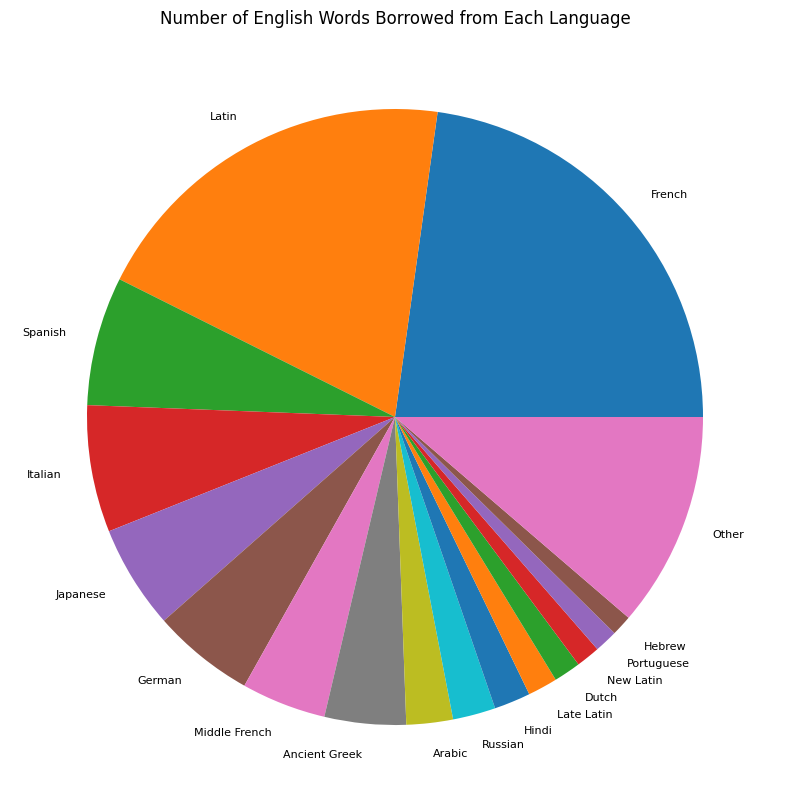

In [36]:
piechart_series.plot.pie(figsize = (10, 10), title = 'Number of English Words Borrowed from Each Language', fontsize = 8)

In [37]:
engl[engl['term'] == 'the']

,term,reltype,related_lang,related_term
4957,the,group_derived_root,NaN,NaN
4958,the,inherited_from,Middle English,the
4959,the,inherited_from,Old English,þē
4960,the,etymologically_related_to,Old English,sē
4961,the,group_related_root,NaN,NaN
4962,the,etymologically_related_to,Old English,sē
4963,the,etymologically_related_to,Old English,sēo
4964,the,etymologically_related_to,Old English,þæt
4965,the,etymologically_related_to,Old English,þā
4966,the,etymologically_related_to,Old English,sē


In [38]:
freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
freqs

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698
...,...
gooek,12711
gooddg,12711
gooblle,12711


In [39]:
# engl['frequency'] = engl['term'].apply(lambda word: freqs.loc[word] if (word in freqs.index) else -1)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
df

,reltype,related_lang,related_term,count,freq
term,,,,,
the,group_related_root,NaN,NaN,2.313585e+10,3.933838e-02
the,etymologically_related_to,Middle English,thi,2.313585e+10,3.933838e-02
the,inherited_from,Middle English,the,2.313585e+10,3.933838e-02
the,group_derived_root,NaN,NaN,2.313585e+10,3.933838e-02
the,cognate_of,Sanskrit,sá,2.313585e+10,3.933838e-02
...,...,...,...,...,...
inhibitive,has_suffix,English,ive,1.271400e+04,2.161788e-08
unswitched,has_prefix_with_root,English,switched,1.271200e+04,2.161448e-08
unswitched,has_prefix,English,un,1.271200e+04,2.161448e-08


In [40]:
from scipy.stats import chi2_contingency

# load csv
df = pd.read_csv("etymology.csv")
reltype_counts = df['reltype'].value_counts()
reltype_counts

,count
reltype,
etymologically_related_to,298533
derived_from,247222
has_affix,223724
inherited_from,211787
has_prefix_with_root,209535
cognate_of,196843
group_derived_root,153359
has_suffix,143220
compound_of,120037


In [44]:
# hypothesis test
observed = reltype_counts.values
n = sum(observed)
k = len(observed)
expected = np.array([n/k] * k)
chi2, p_value = chi2_contingency([observed, expected])[0:2]

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-square statistic: 1661554.8934974251
p-value: 0.0


Text(0, 0.5, 'Occurences')

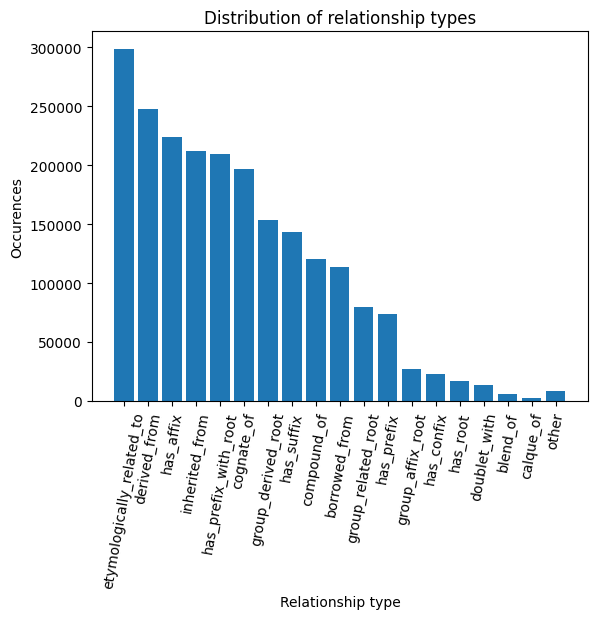

In [46]:
# bar
other = 0
labels = []
values = []

for reltype in reltype_counts.index:
  if reltype_counts[reltype] < 2000:
    other += reltype_counts[reltype]
  else:
    labels.append(reltype)
    values.append(reltype_counts[reltype])

plt.bar([*labels, "other"], [*values, other])
plt.xticks(rotation=80)
plt.title("Distribution of relationship types")
plt.xlabel("Relationship type")
plt.ylabel("Occurences")